# Classification

To attempt classification, one method is to use linear regression and map all predictions greater than 0.5 as a 1 and all less than 0.5 as a 0. However, this method doesn't work well because classification is not actually a linear function.

The classification problem is just like the regression problem, except that the values we now want to predict take on only a small number of discrete values. For now, we will focus on the binary classification problem in which y can take on only two values, 0 and 1. (Most of what we say here will also generalize to the multiple-class case.) For instance, if we are trying to build a spam classifier for email, then x^{(i)}x 
(i)
  may be some features of a piece of email, and y may be 1 if it is a piece of spam mail, and 0 otherwise. Hence, y∈{0,1}. 0 is also called the negative class, and 1 the positive class, and they are sometimes also denoted by the symbols “-” and “+.” Given x^{(i)}x 
(i)
 , the corresponding y^{(i)}y 
(i)
  is also called the label for the training example. 



# Hypothesis Representation

We could approach the classification problem ignoring the fact that y is discrete-valued, and use our old linear regression algorithm to try to predict y given x. However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn’t make sense for h_\theta (x)h 
θ
​	
 (x) to take values larger than 1 or smaller than 0 when we know that y ∈ {0, 1}. To fix this, let’s change the form for our hypotheses h_\theta (x)h 
θ
​	
 (x) to satisfy 0 \leq h_\theta (x) \leq 10≤h 
θ
​	
 (x)≤1. This is accomplished by plugging \theta^Txθ 
T
 x into the Logistic Function.

Our new form uses the "Sigmoid Function," also called the "Logistic Function":

>$h_\theta(x) = g(\theta^Tx)$

>$z = \theta^Tx$

>$g(z) = \frac{1}{1+e^{-z}}$

The following image shows us what the sigmoid function looks like: 

<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/1WFqZHntEead-BJkoDOYOw_2413fbec8ff9fa1f19aaf78265b8a33b_Logistic_function.png?expiry=1621987200000&hmac=DgyBjabCytn8_RkMYOVWiJaPwKohssf2QaYJyRGInPQ">

The function g(z), shown here, maps any real number to the (0, 1) interval, making it useful for transforming an arbitrary-valued function into a function better suited for classification.

>$h_\theta(x)h $

θ(x) will give us the probability that our output is 1. For example, $h_\theta(x)=0.7h $
θ
​	
 (x)=0.7 gives us a probability of 70% that our output is 1. Our probability that our prediction is 0 is just the complement of our probability that it is 1 (e.g. if probability that it is 1 is 70%, then the probability that it is 0 is 30%).



>$h_\theta(x) = P (y=1|x;\theta) = 1 - P(y=0|x;\theta)$

>$P (y=1|x;\theta) + P(y=0|x;\theta) = 1 $

# Decision Boundry

In order to get our discrete 0 or 1 classification, we can translate the output of the hypothesis function as follows:

>$h_\theta(x) \geq 0.5 \rightarrow y=1$

>$h_\theta(x) \lt 0.5 \rightarrow y=1$

The way our logistic function g behaves is that when its input is greater than or equal to zero, its output is greater than or equal to 0.5:



>$g(z) \ge 0.5 $

>$\text{when z} \ge 0$

Remember

>$z = 0, e^0 = 1 \Rightarrow g(z) = 1/2$

>$z \rightarrow \infty, e^{-\infty} \rightarrow 0 \Rightarrow g(z) = 1$

>$z \rightarrow -\infty, e^{-\infty} \rightarrow \infty \Rightarrow g(z) = 0$

So if our input to g is $\theta^T X$, then that means:

>$h_\theta(x) = g(\theta^T x) \ge 0.5$

>$\text{when } \theta^Tx \ge 0$

From these statements we can now say:
    
>$\theta^Tx \ge 0 \Rightarrow y = 1$
    
>$\theta^Tx \lt 0 \Rightarrow y = 0$

The **decision boundary** is the line that separates the area where y = 0 and where y = 1. It is created by our hypothesis function.

__Example:__

>$\theta = \begin{bmatrix}
5 \\
-1 \\
0
\end{bmatrix}$

>$y = 1 \text{ if } 5 + (-1)x_1 + 0x_2 \ge 0$

>$5 - x_1 \ge 0$

>$-x_1 \ge -5$

>$x_1 \le 5$

In this case, our decision boundary is a straight vertical line placed on the graph where $x_1 = 5$, and everything to the left of that denotes y = 1, while everything to the right denotes y = 0.

Again, the input to the sigmoid function g(z) (e.g. $\theta^T X$) doesn't need to be linear, and could be a function that describes a circle (e.g. $z = \theta_0 + \theta_1 x_1^2 +\theta_2 x_2^2$) or any shape to fit our data.

# Cost Function

We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.

Instead, our cost function for logistic regression looks like:

$ \begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*}$

When y = 1, we get the following plot for $J(\theta)J(θ) vs h_\theta (x)h 
θ
​
 (x):$

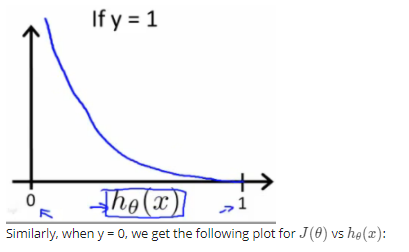

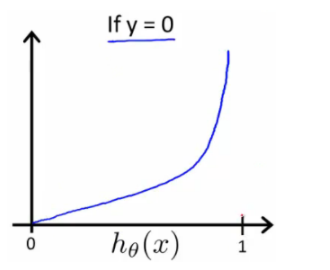

$\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}$

If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.

If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that J(θ) is convex for logistic regression.

# Simplified Cost Function and Gradient Descent 

We can compress our cost function's two conditional cases into one case:

$Cost(h 
θ
​
 (x),y)=−ylog(h 
θ
​
 (x))−(1−y)log(1−h 
θ
​
 (x))$
 
 Notice that when y is equal to 1, then the second term $(1−y)log(1−h 
θ
​
 (x))$
 will be zero and will not affect the result. If y is equal to 0, then the first term $-y \log(h_\theta(x))$
  will be zero and will not affect the result.

We can fully write out our entire cost function as follows:

$J(\theta) = - \frac 1 m \sum \limits_{i=1}^m [ y^{(i)} log(h_\theta(x^{(i)}) + (1 - y^{(i)}log(1 - h_\theta(x^{(i)}))  ]$

A vectorized implementation is:

$\begin{align*} & h = g(X\theta)\newline & J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \end{align*}$

**Gradient Descent** 

Remember that the general form of gradient descent is:

$\begin{align*}& Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \alpha \dfrac{\partial}{\partial \theta_j}J(\theta) \newline & \rbrace\end{align*}$

We can work out the derivative part using calculus to get:

$\begin{align*} & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}$
    
Notice that this algorithm is identical to the one we used in linear regression. We still have to simultaneously update all values in theta.

A vectorized implementation is:

$\theta := \theta - \frac \alpha m X^T(g(X\theta) - \vec y)$

# Advanced Optimization
Note: [7:35 - '100' should be 100 instead. The value provided should be an integer and not a character string.]

"Conjugate gradient", "BFGS", and "L-BFGS" are more sophisticated, faster ways to optimize θ that can be used instead of gradient descent. We suggest that you should not write these more sophisticated algorithms yourself (unless you are an expert in numerical computing) but use the libraries instead, as they're already tested and highly optimized. Octave provides them.

We first need to provide a function that evaluates the following two functions for a given input value θ:

$J(\theta) $

$\frac \partial {\partial \theta_j} J(\theta)$

We can write a single function that returns both of these:

`function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end`

Then we can use octave's "fminunc()" optimization algorithm along with the "optimset()" function that creates an object containing the options we want to send to "fminunc()". (Note: the value for MaxIter should be an integer, not a character string - errata in the video at 7:30)

`options = optimset('GradObj', 'on', 'MaxIter', 100);
initialTheta = zeros(2,1);
   [optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
`

We give to the function "fminunc()" our cost function, our initial vector of theta values, and the "options" object that we created beforehand.

# Multiclass Classification: One-vs-all
Now we will approach the classification of data when we have more than two categories. Instead of y = {0,1} we will expand our definition so that y = {0,1...n}.

Since y = {0,1...n}, we divide our problem into n+1 (+1 because the index starts at 0) binary classification problems; in each one, we predict the probability that 'y' is a member of one of our classes.

$\begin{align*}& y \in \lbrace0, 1 ... n\rbrace \newline& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline& \cdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline\end{align*}$

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

The following image shows how one could classify 3 classes: 



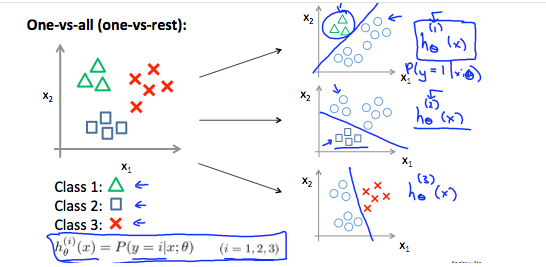

**To summarize:**

 Train a logistic regression classifier $h_\theta(x)$ for each class￼ to predict the probability that ￼ ￼y = i￼ ￼. 

To make a prediction on a new x, pick the class ￼that maximizes  $h_\theta (x)$


# The Problem of Overfitting
Consider the problem of predicting y from x ∈ R. The leftmost figure below shows the result of fitting a $y = \theta_0 + \theta_1x$
 to a dataset. We see that the data doesn’t really lie on straight line, and so the fit is not very good. 

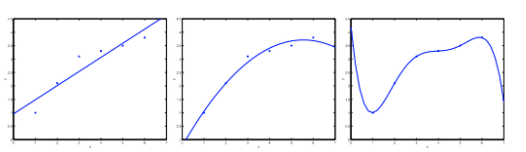

Instead, if we had added an extra feature $x^2$ and fit $y = \theta_0 + \theta_1x + \theta_2x^2$.then we obtain a slightly better fit to the data (See middle figure). Naively, it might seem that the more features we add, the better. However, there is also a danger in adding too many features: The rightmost figure is the result of fitting a 5^{th}5 
th
  order polynomial $y = \sum_{j=0} ^5 \theta_j x^j$We see that even though the fitted curve passes through the data perfectly, we would not expect this to be a very good predictor of, say, housing prices (y) for different living areas (x). Without formally defining what these terms mean, we’ll say the figure on the left shows an instance of underfitting—in which the data clearly shows structure not captured by the model—and the figure on the right is an example of overfitting.

Underfitting, or high bias, is when the form of our hypothesis function h maps poorly to the trend of the data. It is usually caused by a function that is too simple or uses too few features. At the other extreme, overfitting, or high variance, is caused by a hypothesis function that fits the available data but does not generalize well to predict new data. It is usually caused by a complicated function that creates a lot of unnecessary curves and angles unrelated to the data.

This terminology is applied to both linear and logistic regression. There are two main options to address the issue of overfitting:

1) Reduce the number of features:

Manually select which features to keep.
Use a model selection algorithm (studied later in the course).

2) Regularization

Keep all the features, but reduce the magnitude of parameters \theta_jθ 
j
​
 .
Regularization works well when we have a lot of slightly useful features.

# Cost Function

If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following function more quadratic:

$\theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_4x^4$

We'll want to eliminate the influence of $\theta_3x^3 + \theta_4x^4$ . Without actually getting rid of these features or changing the form of our hypothesis, we can instead modify our cost function:

$min_\theta \frac 1 {2m} \sum \limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + 1000 . \theta_3^2 + 1000 . \theta_4^2$

We've added two extra terms at the end to inflate the cost of \theta_3θ 
3
​
  and \theta_4θ 
4
​
 . Now, in order for the cost function to get close to zero, we will have to reduce the values of \theta_3θ 
3
​
  and \theta_4θ 
4
​
  to near zero. This will in turn greatly reduce the values of \theta_3x^3θ 
3
​
 x 
3
  and \theta_4x^4θ 
4
​
 x 
4
  in our hypothesis function. As a result, we see that the new hypothesis (depicted by the pink curve) looks like a quadratic function but fits the data better due to the extra small terms \theta_3x^3θ 
3
​
 x 
3
  and  \theta_4x^4θ 
4
​
 x 
4
 .

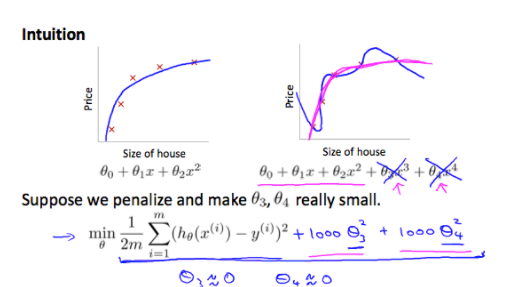

We could also regularize all of our theta parameters in a single summation as:

$min_\theta \frac 1 {2m} \sum \limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum \limits_{j=1}^n \theta_j^2$


The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated. 

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting. Hence, what would happen if \lambda = 0λ=0 or is too small ?

# Regularized Linear Regression

We can apply regularization to both linear regression and logistic regression. We will approach linear regression first.

Gradient Descent
We will modify our gradient descent function to separate out $\theta_0$
  from the rest of the parameters because we do not want to penalize $\theta_0$

$\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}$

The term $\frac \lambda m \theta_j$ performs our regularization. With some manipulation our update rule can also be represented as:
$\theta_j := \theta_j(1 - \alpha \frac \lambda m) - \alpha \frac 1 m \sum \limits_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$  

 The first term in the above equation  $(1 - \alpha \frac \lambda m)$will always be less than 1. Intuitively you can see it as reducing the value of θ 
j
​
  by some amount on every update. Notice that the second term is now exactly the same as it was before.

Normal Equation
Now let's approach regularization using the alternate method of the non-iterative normal equation.

To add in regularization, the equation is the same as our original, except that we add another term inside the parentheses:

$\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}$

L is a matrix with 0 at the top left and 1's down the diagonal, with 0's everywhere else. It should have dimension (n+1)×(n+1). Intuitively, this is the identity matrix (though we are not including x_0x 
0
​
 ), multiplied with a single real number λ.

Recall that if m < n, then X^TXX 
T
 X is non-invertible. However, when we add the term λ⋅L, then X^TXX 
T
 X + λ⋅L becomes invertible.

# Regularized Logistic Regression
We can regularize logistic regression in a similar way that we regularize linear regression. As a result, we can avoid overfitting. The following image shows how the regularized function, displayed by the pink line, is less likely to overfit than the non-regularized function represented by the blue line: 

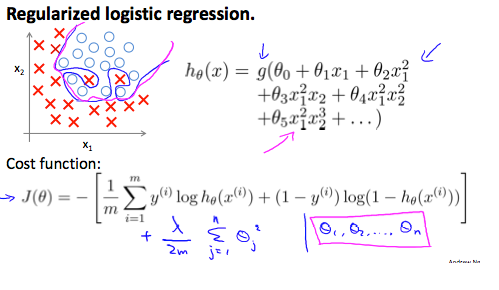

Cost Function

Recall that our cost function for logistic regression was:

$J(\theta) = - \frac 1 m \sum \limits_{i=1}^m [ y^{(i)} log(h_\theta(x^{(i)}) + (1 - y^{(i)}log(1 - h_\theta(x^{(i)}))  ]$

We can regularize this equation by adding a term to the end:

$J(\theta) = - \frac 1 m \sum \limits_{i=1}^m[y^{(i)} log(h_\theta(x^{(i)}) + (1 - y^{(i)}log(1 - h_\theta(x^{(i)}))] + \frac \lambda {2m} \sum_{j=1}^n \theta_j^2$

The second sum, $\sum_{j=1}^n \theta_j^2$ 	​
  means to explicitly exclude the bias term, θ 
0
​
 . I.e. the θ vector is indexed from 0 to n (holding n+1 values, \theta_0θ 
0
​
  through \theta_nθ 
n
​
 ), and this sum explicitly skips \theta_0θ 
0
​
 , by running from 1 to n, skipping 0. Thus, when computing the equation, we should continuously update the two following equations:

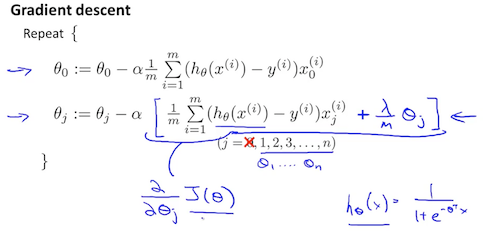